In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [57]:
df = pd.read_csv('data3.csv')

In [58]:
df.head()

,SALE_DT,Perrin Freres monthly champagne sales millions ?64-?72
0,2019-01-01,2815.0
1,2019-01-02,2672.0
2,2019-01-03,2755.0
3,2019-01-04,2721.0
4,2019-01-05,2946.0


In [5]:
df.columns = ['Month', 'Sales']
df.head()

,Month,Sales
0,2019-01-01,2815.0
1,2019-01-02,2672.0
2,2019-01-03,2755.0
3,2019-01-04,2721.0
4,2019-01-05,2946.0


In [6]:
df.shape

(107, 2)

In [7]:
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [8]:
df.tail()

,Month,Sales
102,2019-04-13,4298.0
103,2019-04-14,1413.0
104,2019-04-15,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [9]:
df.drop(106, axis=0, inplace=True)

In [10]:
df.drop(105, axis=0, inplace=True)

In [11]:
df.shape

(105, 2)

In [12]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [13]:
df['Month'] = pd.to_datetime(df['Month'])

In [14]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [15]:
df.head()

,Month,Sales
0,2019-01-01,2815.0
1,2019-01-02,2672.0
2,2019-01-03,2755.0
3,2019-01-04,2721.0
4,2019-01-05,2946.0


In [16]:
df.set_index('Month', inplace=True)

In [17]:
df.head()

,Sales
Month,
2019-01-01,2815.0
2019-01-02,2672.0
2019-01-03,2755.0
2019-01-04,2721.0
2019-01-05,2946.0


In [18]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<Axes: xlabel='Month'>

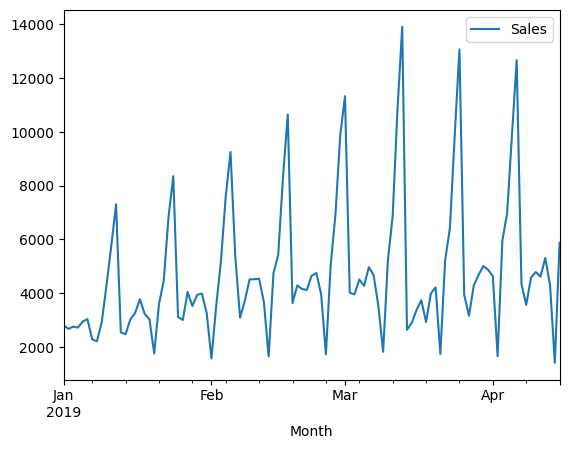

In [19]:
df.plot()

In [20]:
adfuller(df['Sales'])

(-1.833593056327623,
 0.363915771660245,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [21]:
def adfuller_test(sales):
    result = adfuller(sales)
    
    labels = ['ADF test statistics', 'p-value', 'Lags used', 'Number of obs used']
    
    for value, label in zip(result, labels):
        print('{} : {} '.format(label, value))
        
    if result[1]<=0.05:
        print('Strong evidence against null hypothesis, reject the null hypothesis and data is stationary')
    else:
        print('Weak evidence against null hypothesis, accept the null hypothesis and data is not stationary')

In [22]:
adfuller_test(df['Sales'])

ADF test statistics : -1.833593056327623 
p-value : 0.363915771660245 
Lags used : 11 
Number of obs used : 93 
Weak evidence against null hypothesis, accept the null hypothesis and data is not stationary


In [23]:
df

,Sales
Month,
2019-01-01,2815.0
2019-01-02,2672.0
2019-01-03,2755.0
2019-01-04,2721.0
2019-01-05,2946.0
...,...
2019-04-11,4618.0
2019-04-12,5312.0
2019-04-13,4298.0


In [24]:
df['Sales'].shift(1)

Month
2019-01-01       NaN
2019-01-02    2815.0
2019-01-03    2672.0
2019-01-04    2755.0
2019-01-05    2721.0
               ...  
2019-04-11    4788.0
2019-04-12    4618.0
2019-04-13    5312.0
2019-04-14    4298.0
2019-04-15    1413.0
Name: Sales, Length: 105, dtype: float64

In [25]:
df['Sales first diff.'] = df['Sales'] - df['Sales'].shift(1)

In [26]:
df.head()

,Sales,Sales first diff.
Month,,
2019-01-01,2815.0,NaN
2019-01-02,2672.0,-143.0
2019-01-03,2755.0,83.0
2019-01-04,2721.0,-34.0
2019-01-05,2946.0,225.0


In [27]:
df['Seasonal first diff.'] = df['Sales'] - df['Sales'].shift(12)

In [28]:
df.head()

,Sales,Sales first diff.,Seasonal first diff.
Month,,,
2019-01-01,2815.0,NaN,NaN
2019-01-02,2672.0,-143.0,NaN
2019-01-03,2755.0,83.0,NaN
2019-01-04,2721.0,-34.0,NaN
2019-01-05,2946.0,225.0,NaN


In [29]:
adfuller_test(df['Seasonal first diff.'].dropna())

ADF test statistics : -7.626619157213164 
p-value : 2.060579696813685e-11 
Lags used : 0 
Number of obs used : 92 
Strong evidence against null hypothesis, reject the null hypothesis and data is stationary


<Axes: xlabel='Month'>

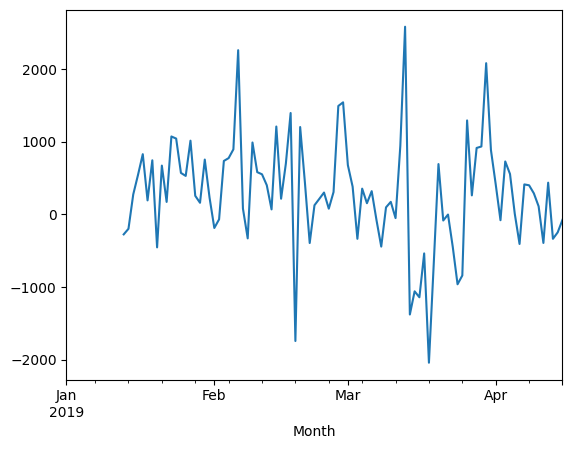

In [30]:
df['Seasonal first diff.'].plot()

In [31]:
df.head(15)

,Sales,Sales first diff.,Seasonal first diff.
Month,,,
2019-01-01,2815.0,NaN,NaN
2019-01-02,2672.0,-143.0,NaN
2019-01-03,2755.0,83.0,NaN
2019-01-04,2721.0,-34.0,NaN
2019-01-05,2946.0,225.0,NaN
2019-01-06,3036.0,90.0,NaN
2019-01-07,2282.0,-754.0,NaN
2019-01-08,2212.0,-70.0,NaN
2019-01-09,2922.0,710.0,NaN


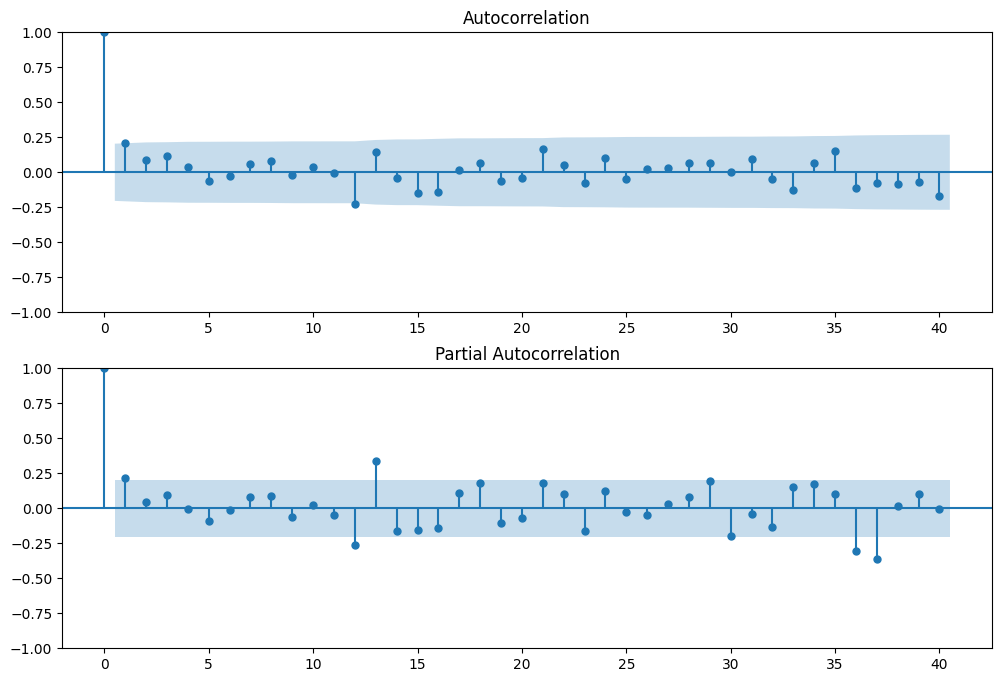

In [32]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal first diff.'].iloc[13:], lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal first diff.'].iloc[13:], lags=40, ax=ax2)

In [34]:
model = ARIMA(df['Sales'], order=(1,1,1))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [35]:
model = model.fit()

NameError: name 'model' is not defined

In [36]:
model.summary()

NameError: name 'model' is not defined

In [37]:
df.shape

(105, 3)

In [38]:
df['forecast'] = model.predict(start=90, end=103, dynamic=True)

NameError: name 'model' is not defined

In [39]:
df.tail(20)

,Sales,Sales first diff.,Seasonal first diff.
Month,,,
2019-03-27,3162.0,-772.0,263.0
2019-03-28,4286.0,1124.0,916.0
2019-03-29,4676.0,390.0,936.0
2019-03-30,5010.0,334.0,2083.0
2019-03-31,4874.0,-136.0,888.0
2019-04-01,4633.0,-241.0,416.0
2019-04-02,1659.0,-2974.0,-79.0
2019-04-03,5951.0,4292.0,730.0
2019-04-04,6981.0,1030.0,557.0


In [40]:
df[['Sales', 'forecast']].plot(figsize=(12,8))

KeyError: "['forecast'] not in index"

In [41]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))

E:\All_Python_Frameworks\FORECAST_TEST\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\All_Python_Frameworks\FORECAST_TEST\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [42]:
results = model.fit()

In [43]:
df['forecast_SARIMAX'] = results.predict(start=90, end=103, dynamic=True)

In [44]:
df.tail(20)

,Sales,Sales first diff.,Seasonal first diff.,forecast_SARIMAX
Month,,,,
2019-03-27,3162.0,-772.0,263.0,NaN
2019-03-28,4286.0,1124.0,916.0,NaN
2019-03-29,4676.0,390.0,936.0,NaN
2019-03-30,5010.0,334.0,2083.0,NaN
2019-03-31,4874.0,-136.0,888.0,NaN
2019-04-01,4633.0,-241.0,416.0,4437.324143
2019-04-02,1659.0,-2974.0,-79.0,2050.747444
2019-04-03,5951.0,4292.0,730.0,5493.376381
2019-04-04,6981.0,1030.0,557.0,6752.039127


<Axes: xlabel='Month'>

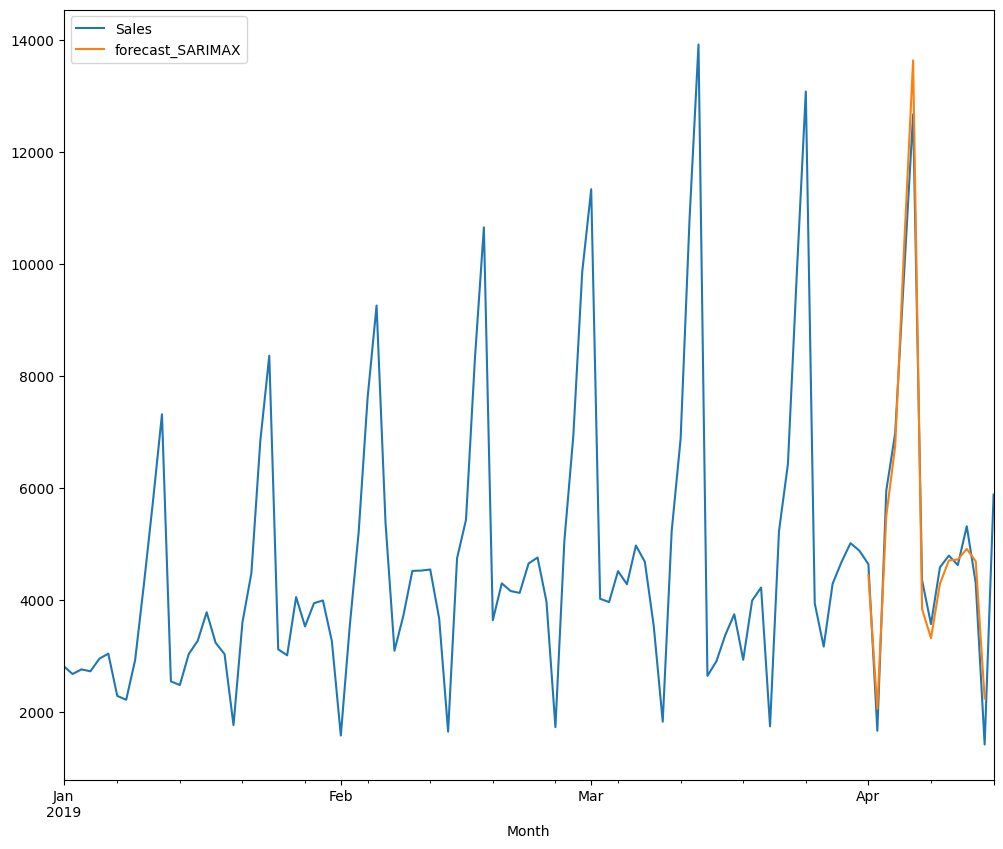

In [45]:
df[['Sales','forecast_SARIMAX']].plot(figsize=(12,10))

In [46]:
future_dates = [df.index[-1] + DateOffset(months=x)for x in range(0,12)]

In [47]:
future_dates[1:]

[Timestamp('2019-05-15 00:00:00'),
 Timestamp('2019-06-15 00:00:00'),
 Timestamp('2019-07-15 00:00:00'),
 Timestamp('2019-08-15 00:00:00'),
 Timestamp('2019-09-15 00:00:00'),
 Timestamp('2019-10-15 00:00:00'),
 Timestamp('2019-11-15 00:00:00'),
 Timestamp('2019-12-15 00:00:00'),
 Timestamp('2020-01-15 00:00:00'),
 Timestamp('2020-02-15 00:00:00'),
 Timestamp('2020-03-15 00:00:00')]

In [48]:
future_dataset = pd.DataFrame(index = future_dates[1:], columns = df.columns)

In [49]:
future_dataset.tail()

,Sales,Sales first diff.,Seasonal first diff.,forecast_SARIMAX
2019-11-15,NaN,NaN,NaN,NaN
2019-12-15,NaN,NaN,NaN,NaN
2020-01-15,NaN,NaN,NaN,NaN
2020-02-15,NaN,NaN,NaN,NaN
2020-03-15,NaN,NaN,NaN,NaN


In [50]:
future_df = pd.concat([df, future_dataset])

In [51]:
future_df.shape

(116, 4)

In [52]:
future_df['forecast_SARIMAX2'] = results.predict(start=90, end=124, dynamic=True)

<Axes: >

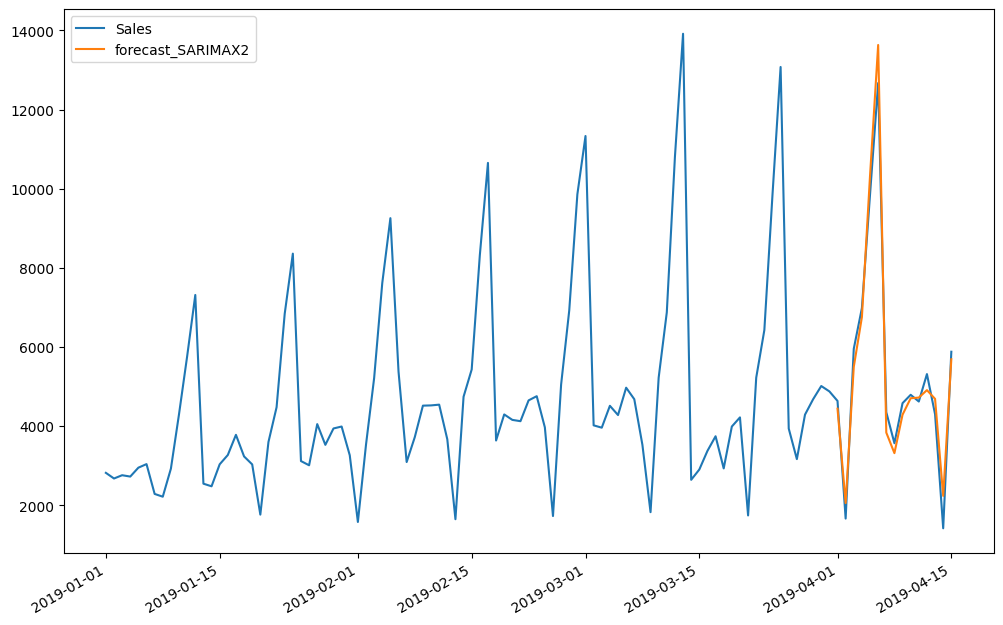

In [53]:
future_df[['Sales', 'forecast_SARIMAX2']].plot(figsize=(12,8))